# Week 5 - Sampling & Reliability

Up until this week, we have assumed that the corpus you have used for analysis assignments represented a *meaningful* assemblage of texts from which reasonable inferences could be drawn about the social game, social world and social actors that produced it. This week, we ask you to articulate what your sample represents in context of your final project, and draw upon methods we have developed over the last three weeks to draw reasonable and representative samples. 

This week we also pivot from our recent work on unsupervized machine learning approaches to explore how we can get *human* readings of content at scale. We want to gather and utilize human responses for several reasons. First, we may want to use crowdsourced human scores as the primary method of coding, extracting or organizing content (as it was in the two of the assigned readings). Second, we may want to validate or tune a computational algorithm we may have developed in terms of how it is associated with human meanings or experience. Finally, we may want to use human coding on a sample of data as the basis for training a model or algorithm to then extrapolate *human-like* annotations to the entire population. Here intelligent sampling is critical to maximize effective maching training. 

For this notebook we will be using the following packages

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

## <span style="color:red">*Pitch Your Project*</span>

<span style="color:red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

## ***What?*** 
For my final project I will be looking at a corpus of New York Times articles that contain the word cyber. The idea is to look at a corpus of articles from a span of ten years, and analyze how over time the discourse on cyber, particularly that related to security, has changed. Additionally, I will consider other aspects of cyber, such as its relation to "popular" trends such as Cyber Monday, have also evolved over time. 

## ***Why?***
The concept of cyber is relatively new, and as a result has been rapidly changing in recent years. While its been linked to popular trends such as "Cyber Monday", I am particularly interested in its relation to securitization. There are various international relations theories on how an issue becomes securitized, and discourse usually has an important role in this. As such, by analyzing the change in discourse on cybersecurity, I hope to provide futher insight into how this new and quickly evolving phenomena is entering the realm of security. 

## ***How?***
I have recently downloaded an overall corpus that I will be basing my research on. This corpus contains all New York Times articles that mention "cyber" from the past ten years. The corpus contains close to 2,000 articles. If given enough time, I will attempt to add a couple more years to the corpus; However, given that this has been a slowly developing project, and I have had many challenges developing this corpus, I am satisfied with the current conditions of the corpus. I hope to be able to apply methods to the overall corpus, in addition to sub-sections of the corpus. Specifically, given my particular interest in cyber as it relates to security, I will apply methods to parts of the corpus that are more related to security than others. To do so, I will rely on clustering, as it will provide me with the tools to break up the corpus into different sub-groups.

## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication)? (<200 words).

## ***Which (words)?***
Using New York Times articles is representative of a unique actor within the realm of international relations. While they include information, in a supposedly unbiased manner, related to government officials and state actors, they are also inevitably linked to the general public. In many ways, the serve as a bridge between the two types of actors. As such, I am aware that much of the discourse I will look at will be initially based on an effort to represent facts, rather than opinion. However, as facts develop, so does the discourse revolving around how to describe those facts. This change will inform the securitization of "cyber". I will specifically look at patterns surrounding the use of the word cyber, as well as broader analysis of the corpus, particulalry that related to clustering. 

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">In the cells immediately following, demonstrate three approaches drawn from any of the last three weeks to create subsamples of your corpus (e.g., for crowd-sourced subcoding like we'll be doing this week). Methods of subsampling include (a) corpus linguistic approaches drawing on word presence or co-presence, conditional frequencies, weighted words (e.g., tf.idf), KL or JS divergences, etc.; (b) hierarchical or flat clustering approaches; (c) topic modeling; or (d) word-embedding. (<200 words).

I spent a significant amount of time this week finalizing my corpus. As I'm sure you have noticed, I was having a really hard time developing my corpus, which as a result produced lackluster homework assignments for the last few weeks. This week, I spent more time reviewing HW 1 and applying it to a new data set. As such, in order to spend more time on the significant portions of this week's homework - maingly, the sampling aspects - I decided to use Exercise 1 as efficiently as possible. As you will see, I have limited it to mainly clustering, and reducing it to methods related to HW 3. I will continue to expand upon this with my new corpus, but this week I aimed to priotize Exercise 2 and 3, involving Mechanical Turk, as well as the supplement from 4th week. 

In [11]:
nytCorpus = pandas.read_csv('/Users/Enya/Desktop/content-analysis-2018/nytFull.csv')

In [12]:
print (nytCorpus)

                                                article                  date
0     Blogs                                      (Bi...    : January 6 2014  
1         Gabriel Vaughn, the commando turned human ...   : January 10 2014  
2         WASHINGTON -- The National Security Agency...   : January 15 2014  
3         TOKYO -- An arms race between the two most...   : January 17 2014  
4         Following is the text of President Obama's...   : January 18 2014  
5         WASHINGTON -- Google, which briefly consid...   : January 22 2014  
6         If the Air Force cheating scandal disclose...   : January 20 2014  
7         WASHINGTON -- The heads of the House and S...   : January 20 2014  
8     Blogs                                (You're t...   : January 21 2014  
9     Blogs                                      (Bi...   : January 22 2014  
10        WASHINGTON -- A three-year study by the Pe...   : January 24 2014  
11    Blogs                                    (Deal...   : Janu

In [41]:
import requests #for http requests
import nltk #the Natural Language Toolkit
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics
import sklearn.manifold #For a manifold plot
from nltk.corpus import stopwords #For stopwords
import json #For API responses
import urllib.parse #For joining urls
import gensim #For topic modeling

In [18]:
nytCorpus['tokenized-article'] = nytCorpus.apply(lambda row: nltk.word_tokenize(row['article']), axis=1)

In [21]:
countsDict = {}
for word in nytCorpus['tokenized-article'].sum():
    if word in countsDict:
        countsDict[word] +=1
    else:
        countsDict[word] =1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:200]

[(',', 145850),
 ('the', 115434),
 ('.', 110114),
 ('to', 62330),
 ('of', 59576),
 ('a', 54399),
 ('and', 53770),
 ('in', 40227),
 ('[', 36516),
 (']', 36516),
 ('#', 36461),
 ('that', 32631),
 ("'s", 25461),
 ("''", 25006),
 (':', 23341),
 ('is', 21357),
 ('on', 19559),
 ('for', 19499),
 ('it', 15197),
 ('with', 14438),
 ('was', 13809),
 ('The', 13335),
 ('said', 12918),
 ('I', 12215),
 ('as', 11847),
 ('Mr.', 11395),
 ('have', 11349),
 ('at', 11090),
 ('are', 10630),
 ('by', 10384),
 ('be', 10290),
 ('--', 10062),
 ('he', 9998),
 ('not', 9808),
 (')', 9622),
 ('(', 9584),
 ('an', 9465),
 ('from', 9331),
 ('you', 9321),
 ('has', 8906),
 ('``', 8298),
 ('they', 7388),
 ('who', 7338),
 ('this', 7310),
 ('we', 7282),
 ('or', 7275),
 ('about', 7202),
 ('his', 7117),
 ('had', 6332),
 ('their', 6191),
 ("n't", 5859),
 ('more', 5854),
 ('would', 5613),
 ('its', 5604),
 ('but', 5429),
 ('do', 5292),
 ('?', 5244),
 ('will', 5231),
 ('\\xD0', 5172),
 ('been', 5121),
 ('were', 5002),
 ('But', 49

Word Count Vectors

In [26]:
#First it needs to be initialized
nytCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
nytVects = nytCountVectorizer.fit_transform(nytCorpus['article'])
print(nytVects.shape)

(1952, 54277)


In [27]:
nytCountVectorizer.vocabulary_.get('cyber')

12415

In [28]:
#initialize
nytTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(nytVects)
#train
nytTF = nytTFTransformer.transform(nytVects)
print(nytTF.shape)

(1952, 54277)


In [30]:
list(zip(nytCountVectorizer.vocabulary_.keys(), nytTF.data))[:30]

[('blogs', 0.020435635294312207),
 ('bits', 0.029250144053687147),
 ('highlight', 0.016756894537129953),
 ('palo', 0.3361598151900464),
 ('alto', 0.3285859832236995),
 ('networks', 0.165726580899064),
 ('has', 0.030603925122319162),
 ('acquired', 0.08164754299869989),
 ('morta', 0.3478837627611025),
 ('security', 0.2564173460140077),
 ('silicon', 0.13319175417157098),
 ('valley', 0.12783294989948377),
 ('start', 0.06330004425494012),
 ('up', 0.03542143052452713),
 ('run', 0.04524456876428658),
 ('by', 0.037828894066321894),
 ('former', 0.03598838352926722),
 ('employees', 0.057094556748949726),
 ('of', 0.1242490513282417),
 ('the', 0.23004041583886242),
 ('national', 0.03229161333572668),
 ('agency', 0.04093876654594465),
 ('and', 0.10655373283800713),
 ('united', 0.03065085336548207),
 ('states', 0.03007515234525378),
 ('air', 0.05143544888883928),
 ('force', 0.048820037449433515),
 ('it', 0.018827285516128896),
 ('8217', 0.038854510543410326),
 ('second', 0.04503010474862569)]

In [31]:
nytTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.2, max_features=1000, min_df=1, stop_words='english',)
nytTFVects = nytTFVectorizer.fit_transform(nytCorpus['article'])

In [47]:
#Clustering below. Used silhouette to determine number of clusters.

def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = matplotlib.cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = matplotlib.cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))


In [ ]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(nytTFVects.toarray())
reduced_data = pca.transform(nytTFVects.toarray())

In [ ]:
X = nytTFVects.toarray()
plotSilhouette(5, X)

In [ ]:
X = nytTFVects.toarray()
plotSilhouette(10, X)

In [ ]:
X = nytTFVects.toarray()
plotSilhouette(15, X)

In [57]:
nytnumClusters = 8
km = sklearn.cluster.KMeans(n_clusters=nytnumClusters, init='k-means++')
km.fit(nytTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
print("for our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(nytCorpus['article'], km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(nytCorpus['article'], km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(nytCorpus['article'], km.labels_)))

for our clusters:
Homogeneity: 0.233
Completeness: 1.000
V-measure: 0.377


In [59]:
terms = nytTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(nytnumClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 google
 sony
 software
 users
 app
 sites
 privacy
 apple
 businesses
 billion


Cluster 1:
 iran
 iranian
 israel
 israeli
 nuclear
 saudi
 romney
 islamic
 sites
 oil


Cluster 2:
 trump
 russian
 russia
 election
 putin
 clinton
 comey
 committee
 donald
 hacking


Cluster 3:
 shopping
 sales
 retailers
 thanksgiving
 holiday
 black
 stores
 shoppers
 deals
 retail


Cluster 4:
 north
 korea
 missile
 korean
 nuclear
 kim
 trump
 missiles
 south
 test


Cluster 5:
 bank
 financial
 banks
 jpmorgan
 dealbook
 firms
 firm
 credit
 billion
 investors


Cluster 6:
 chinese
 nuclear
 pentagon
 networks
 snowden
 xi
 beijing
 command
 cybersecurity
 cyberattacks


Cluster 7:
 book
 women
 police
 film
 children
 music
 man
 family
 video
 young




In [60]:
nytCorpus['cluster'] = km.labels_

In [62]:
type (nytCorpus['cluster'])

pandas.core.series.Series

In [63]:
nytCorpus['cluster'] = nytCorpus['cluster'].astype(str)

In [64]:
cyberMon = nytCorpus[nytCorpus['cluster'].str.contains('3', na = False)]
usElection = nytCorpus[nytCorpus['cluster'].str.contains('2', na = False)]
cybersec = nytCorpus[nytCorpus['cluster'].str.contains('6', na = False)]

In [68]:
print (len(cyberMon), len(usElection), len(cybersec))

147 175 264


In [ ]:
# articles from cyberMon: 158, 392, 1118, 1935
# usElection: 679, 1335, 1433, 1607
# cybersec: 51, 857, 1128, 1834

For my survey I decided to use excerpts from the random speeches above and ask the responders what category (based on the clusters I initially found) the excerpts best fit. I used the code (in hashtag below) to obtain the text to then copy and paste into the survey.

In [ ]:
#nytCorpus.loc[number]['article']

# Example Annotation Dataset

In [93]:
x = np.loadtxt("../data/pyAnno/testdata_numerical.txt")
anno = AnnotationsContainer.from_array(x, missing_values=[-1])

Interrogate the AnnotationsContainer object.

In [94]:
anno.annotations

array([[ 1,  2,  3, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 2,  2,  1, ..., -1, -1, -1],
       ...,
       [ 2,  2, -1, ..., -1, -1,  1],
       [ 2,  2, -1, ..., -1, -1,  3],
       [ 1,  1, -1, ..., -1, -1,  0]])

In [95]:
anno.labels

[1.0, 2.0, 3.0, 4.0]

In [96]:
anno.missing_values

[-1]

# Annotation Statistics

First, we assume categorical codes...that each code is qualitatively distinct from each other. Two measures are primarily used for this: Scott's $\pi$, Cohen's $\kappa$, and Krippendorff's $\alpha$ which each measure the extent of agreement between two annotators, but take into account the possibility of the agreement occurring by chance in slightly different ways. Any agreement measure begins with the frequency of codes:

In [ ]:
pyanno.measures.agreement.labels_frequency(anno.annotations,4)

Now consider the "confusion matrix" or matrix of coded agreements between any two coders:

In [ ]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],4)
print(c)
ac = seaborn.heatmap(c)
plt.show()

Scott's $\pi$ is computed as:

$\pi = \frac{\text{Pr}(a)-\text{Pr}(e)}{1-\text{Pr}(e)}$

Where Pr($a$) is relative observed agreement, and Pr($e$) is expected agreement using joint proportions calculated from the confusion matrix or matrix of coded agreements between any two coders:

In [ ]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])

The generalization of Scott's $\pi$ to $n$ coders is Fleiss' $\kappa$ (Fleiss called it $\kappa$ because he thought he was generalizing Cohen's $\kappa$)

In [ ]:
fleiss_kappa(anno.annotations[::])

Krippendorff's $\alpha$ generalizes of Fleiss' $\kappa$ to $n$ coders and takes into account the fact that annotations here are not categorically different, but ordinal, by adding a weight matrix in which off-diagonal cells contain weights indicating the seriousness of the disagreement between each score. When produced with no arguments, it simply produces an arithmetic distance (e.g., 3-1=2), such that cells one off the diagonal are weighted 1, two off 2, etc.

In [ ]:
krippendorffs_alpha(anno.annotations[::])

Like Scott's $\pi$, Cohen's $\kappa$ also takes into account the possibility of the agreement occurring by chance, but in the following way:

$\kappa = \frac{p_o-p_e}{1-p_e}=1-\frac{1-p_o}{p_e}$

where $p_o$ is the relative observed agreement among raters, and $p_e$ is the hypothetical probability of chance agreement, using the observed data to calculate the probabilities of each observer randomly saying each category. If the raters are in complete agreement then $\kappa = 1$. If there is no agreement among the raters other than what would be expected by chance (as given by $p_e$), $\kappa ≤ 0 $. Here, Cohen's $\kappa$ statistic for the first two annotators is computed. This is probably the most common metric of agreement.

In [ ]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])

In [ ]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)

In [ ]:
ax = seaborn.heatmap(m)
plt.show()

You can see that this 8 by 3 loop design will be less stable than an 8 choose 3 combinatorial design, because each codes with more others. 

One can also assess the average Cohen's $\kappa$ for all pairs of coders that have coded against one another:

In [ ]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, anno.annotations)

As recognized with Krippendorff's flexible $\alpha$, our scores are *not* categorical, but rather ordered and her considered metric. Weighted $\kappa$ allows you to count disagreements differently and is useful when codes are ordered as they are here. Here a weight matrix is added to the calculation, in which off-diagonal cells contain weights indicating the seriousness of the disagreement between each score. When automatically produced, it simply produces an arithmetic distance (e.g., 3-1=2), such that cells one off the diagonal are weighted 1, two off 2, etc. Here

$\kappa = 1-\frac{\sum^k_{i=1}\sum^k_{j=1}w_{ij}x_{ij}}{\sum^k_{i=1}\sum^k_{j=1}w_{ij}m_{ij}}$

where $\kappa$ = $n$ codes and $w_{ij}$,$x_{ij}$, and $m_{ij}$ represent elements in the weight, observed, and expected matrices, respectively. (Obviously, when diagonal cells contain weights of 0 and off-diagonal cells weights of 1, this equals $\kappa$).

In [ ]:
cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,1])

Or averaged over the total:

In [ ]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

Alternatively, if the annontation data can be understood as indicating real values, we can assess not agreement, but rather the correlation of values (Pearson's $\rho$) or correlation of ranks (Spearman's $\rho$) for pairs of coders:

In [ ]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

Or averaged over all comparable pairs:

In [ ]:
print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))

## <span style="color:red">*Excercise 2*</span>

<span style="color:red">Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the MTurk slides on this week's Canvas page.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

In [118]:
mturkResultsDF = pandas.read_csv("../5-Reliability/mturkCyber_results.csv")

In [119]:
mturkResultsDF

,Answer.Topic,Answer.Topic1,Answer.Topic10,Answer.Topic11,Answer.Topic12,Answer.Topic2,Answer.Topic3,Answer.Topic4,Answer.Topic5,Answer.Topic6,Answer.Topic7,Answer.Topic8,Answer.Topic9
0,"Other, NOT Cyber","Other, NOT Cyber","Other, Cyber","Other, NOT Cyber",Security,"Other, Cyber","Other, Cyber","Other, NOT Cyber","Other, NOT Cyber",Security,"Other, NOT Cyber","Other, NOT Cyber","Other, NOT Cyber"
1,"Other, NOT Cyber",U.S. 2016 Election,Security,U.S. 2016 Election,Cyber Monday,Security,Cyber Monday,U.S. 2016 Election,U.S. 2016 Election,Security,U.S. 2016 Election,Security,"Other, NOT Cyber"
2,"Other, NOT Cyber",U.S. 2016 Election,U.S. 2016 Election,U.S. 2016 Election,U.S. 2016 Election,Security,U.S. 2016 Election,Cyber Monday,U.S. 2016 Election,Security,Cyber Monday,Security,U.S. 2016 Election
3,"Other, NOT Cyber","Other, Cyber","Other, NOT Cyber",Cyber Monday,Cyber Monday,Security,"Other, Cyber",U.S. 2016 Election,U.S. 2016 Election,Security,"Other, NOT Cyber",Security,Cyber Monday
4,"Other, NOT Cyber","Other, NOT Cyber",Security,"Other, NOT Cyber",Security,"Other, Cyber",Security,Security,"Other, NOT Cyber",Cyber Monday,"Other, NOT Cyber","Other, NOT Cyber",U.S. 2016 Election
5,"Other, NOT Cyber","Other, NOT Cyber",U.S. 2016 Election,Cyber Monday,Security,Security,Security,Security,U.S. 2016 Election,Security,U.S. 2016 Election,Cyber Monday,Cyber Monday
6,"Other, NOT Cyber","Other, NOT Cyber","Other, NOT Cyber","Other, NOT Cyber",Security,"Other, Cyber","Other, Cyber","Other, NOT Cyber","Other, NOT Cyber",Security,"Other, Cyber","Other, NOT Cyber","Other, NOT Cyber"
7,"Other, NOT Cyber",U.S. 2016 Election,Cyber Monday,Security,Security,Cyber Monday,U.S. 2016 Election,Cyber Monday,Cyber Monday,Security,U.S. 2016 Election,U.S. 2016 Election,Cyber Monday
8,"Other, NOT Cyber",Security,Security,Cyber Monday,Cyber Monday,Cyber Monday,U.S. 2016 Election,Cyber Monday,"Other, Cyber",U.S. 2016 Election,Security,Cyber Monday,"Other, Cyber"
9,"Other, NOT Cyber","Other, NOT Cyber","Other, NOT Cyber",Cyber Monday,"Other, Cyber",Security,Security,"Other, NOT Cyber","Other, NOT Cyber","Other, Cyber","Other, NOT Cyber",Cyber Monday,Cyber Monday


In [122]:
mturkResultsDF.replace('U.S. 2016 Election', 1 , inplace=True)
mturkResultsDF.replace('Security', 2 , inplace=True)
mturkResultsDF.replace('Cyber Monday', 3 , inplace=True)
mturkResultsDF.replace('Other, Cyber', 4 , inplace=True)
mturkResultsDF.replace('Other, NOT Cyber', 5 , inplace=True)
mturkResultsDF

,Answer.Topic,Answer.Topic1,Answer.Topic10,Answer.Topic11,Answer.Topic12,Answer.Topic2,Answer.Topic3,Answer.Topic4,Answer.Topic5,Answer.Topic6,Answer.Topic7,Answer.Topic8,Answer.Topic9
0,5.0,5,4,5,2,4,4,5,5,2,5,5,5
1,5.0,1,2,1,3,2,3,1,1,2,1,2,5
2,5.0,1,1,1,1,2,1,3,1,2,3,2,1
3,5.0,4,5,3,3,2,4,1,1,2,5,2,3
4,5.0,5,2,5,2,4,2,2,5,3,5,5,1
5,5.0,5,1,3,2,2,2,2,1,2,1,3,3
6,5.0,5,5,5,2,4,4,5,5,2,4,5,5
7,5.0,1,3,2,2,3,1,3,3,2,1,1,3
8,5.0,2,2,3,3,3,1,3,4,1,2,3,4
9,5.0,5,5,3,4,2,2,5,5,4,5,3,3


In [130]:
response = []

for index,row in mturkResultsDF.iterrows():
    r = [row['Answer.Topic1'], row['Answer.Topic2'],row['Answer.Topic3'],row['Answer.Topic4'],row['Answer.Topic5'],row['Answer.Topic6'],row['Answer.Topic7'],row['Answer.Topic8'],row['Answer.Topic9'],row['Answer.Topic10'],row['Answer.Topic11'],row['Answer.Topic12']]
    response.append(r)

In [131]:
anno = AnnotationsContainer.from_array(response, missing_values=[-1])

In [132]:
anno.annotations

array([[4, 3, 3, 4, 4, 1, 4, 4, 4, 3, 4, 1],
       [0, 1, 2, 0, 0, 1, 0, 1, 4, 1, 0, 2],
       [0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0],
       [3, 1, 3, 0, 0, 1, 4, 1, 2, 4, 2, 2],
       [4, 3, 1, 1, 4, 2, 4, 4, 0, 1, 4, 1],
       [4, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1],
       [4, 3, 3, 4, 4, 1, 3, 4, 4, 4, 4, 1],
       [0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1],
       [1, 2, 0, 2, 3, 0, 1, 2, 3, 1, 2, 2],
       [4, 1, 1, 4, 4, 3, 4, 2, 2, 4, 2, 3],
       [2, 1, 0, 4, 3, 2, 1, 3, 2, 2, 3, 3],
       [4, 1, 1, 4, 4, 1, 0, 3, 3, 1, 2, 1],
       [3, 3, 1, 3, 1, 3, 1, 2, 1, 1, 1, 3],
       [1, 2, 2, 3, 3, 1, 1, 0, 2, 1, 1, 0],
       [1, 3, 1, 4, 0, 3, 2, 4, 3, 1, 2, 0],
       [4, 3, 1, 1, 0, 1, 3, 4, 2, 0, 2, 1],
       [4, 3, 3, 4, 0, 3, 4, 4, 2, 0, 4, 3],
       [1, 2, 2, 0, 3, 2, 3, 1, 3, 0, 3, 2],
       [4, 3, 1, 1, 0, 3, 0, 4, 4, 0, 4, 3],
       [4, 3, 1, 1, 4, 2, 4, 4, 0, 1, 4, 1],
       [1, 3, 3, 4, 0, 3, 1, 2, 2, 3, 2, 3],
       [4, 1, 1, 4, 0, 3, 4, 4, 3, 1, 4, 3],
       [0,

In [133]:
anno.labels

[1.0, 2.0, 3.0, 4.0, 5.0]

In [137]:
pyanno.measures.agreement.labels_frequency(anno.annotations,0)

array([0.14423077, 0.24679487, 0.20032051, 0.19871795, 0.2099359 ])

In [ ]:
#Confusion Matrix

[[ 0.  3.  2.  0.  0.]
 [ 0.  0.  4.  3.  0.]
 [ 0.  3.  0.  0.  0.]
 [ 0.  3.  2.  2.  0.]
 [ 0. 11.  2. 16.  1.]]


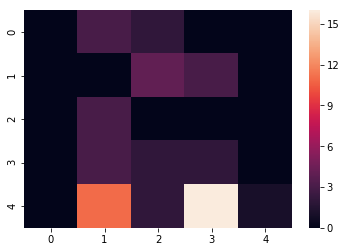

In [154]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],5)
print(c)
ac = seaborn.heatmap(c)
plt.show()

In [155]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])

-0.2508591065292097

In [156]:
fleiss_kappa(anno.annotations[::])

0.03265990436560385

In [157]:
krippendorffs_alpha(anno.annotations[::])

0.07626741959451422

In [158]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])

-0.08103521425540942

In [159]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)

[[ 1.         -0.08103521  0.04666667  0.12696747  0.08110557 -0.01313003
   0.15217391  0.21551724  0.04455673  0.01541171  0.07230047 -0.04610226]
 [-0.08103521  1.          0.21417405 -0.04193849  0.00557769  0.16407982
  -0.02006242  0.05699482 -0.01157943  0.15426318 -0.05513895  0.0828434 ]
 [ 0.04666667  0.21417405  1.         -0.05548038  0.02315422  0.1929643
   0.04265828 -0.04266212 -0.04094631  0.18431373 -0.10884052  0.21986549]
 [ 0.12696747 -0.04193849 -0.05548038  1.          0.06145251 -0.13358071
   0.09390126  0.04278607 -0.02831461  0.07706679 -0.02662994  0.03480278]
 [ 0.08110557  0.00557769  0.02315422  0.06145251  1.         -0.0594947
   0.12930233  0.04931973  0.03786575  0.1149954   0.1641286   0.08103448]
 [-0.01313003  0.16407982  0.1929643  -0.13358071 -0.0594947   1.
  -0.11777877 -0.00862069 -0.00321543  0.05081401 -0.10198675  0.30961232]
 [ 0.15217391 -0.02006242  0.04265828  0.09390126  0.12930233 -0.11777877
   1.          0.04725169 -0.00630063  0.1

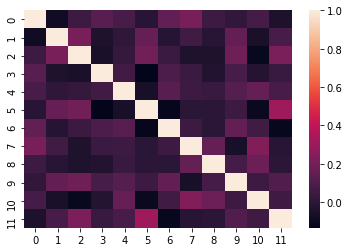

In [160]:
ax = seaborn.heatmap(m)
plt.show()

In [161]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,response[0]], array[:,response[1]]) for response in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, anno.annotations)

0.04941031768283482

In [162]:
cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.05049594229035137

In [163]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

0.07187809541569443

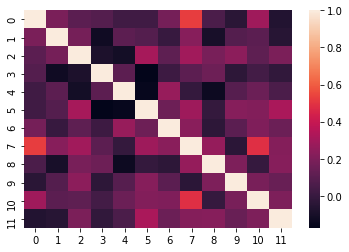

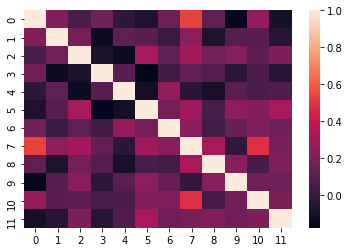

In [164]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

In [165]:
print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))

0.11158415085235257 0.10813045969605206


I am not convinced by the accuracy of these surveys given the Scotts Pi or Cohens Kappa results found above. While my data set contained over 50 survey responses, each with 12 texts being measured, I believe that the responses were too varied, which suggest that the bases of my survey - cluster representation - may have been less accurate than initially thought. Alternatively, there may have been issues with the formation of my survey which lead to such varied responses. 

# Models

However, what if some coders are better than others. The prior measures all rely on the assumption that all coders are equally good. What if some are worse than others? Now we use Rzhetsky et al (2009) and Dawid & Skene's models to make inference about true label classes by downweighting bad or deviant coders. Pyanno provides two relevant models: ModelB and ModelBt. Model B with $\theta$s models the relationship between each coder and code. Model B is a Bayesian generalization of the Dawid & Skene model from the reading. The following image schematically describes these models. <img src="../data/pyanno/Bmodel.png">

The models should provide very similar results. To estimate the parameters for any models, we first need to create a new model. 

In [170]:
# create a new instance of model B, with 4 label classes
model = ModelB.create_initial_state(5, 12)
# other model parameters are initialized from the model prior
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[0.73912532 0.1187446  0.11656892 0.01065885 0.01490232]
  [0.08910658 0.72387226 0.11761321 0.03567265 0.03373529]
  [0.03373718 0.13676689 0.60332017 0.1229507  0.10322506]
  [0.03281661 0.03947706 0.07339316 0.62886438 0.22544879]
  [0.08537758 0.02538174 0.05873938 0.08859708 0.74190422]]

 [[0.72787553 0.12460346 0.06087877 0.01639697 0.07024527]
  [0.1172219  0.63860928 0.12601975 0.10494735 0.01320172]
  [0.03752935 0.0419433  0.53880029 0.27753156 0.1041955 ]
  [0.06308621 0.09151332 0.02910705 0.53503383 0.28125958]
  [0.02068863 0.0186071  0.02892152 0.28254861 0.64923414]]

 [[0.8524793  0.06317235 0.04854649 0.00140928 0.03439258]
  [0.21497209 0.46001943 0.23471962 0.03675342 0.05353545]
  [0.02372    0.22796129 0.52778168 0.16029811 0.06023892]
  [0.02293811 0.04889713 0.09531019 0.66884938 0.16400519]
  [0.00800459 0.02289861 0.04869542 0.2577979  0.66260348]]

 [[0.6400192  0.09885147 0.1743343  0.00767184 0.07912319]
  [0.02943096 0.75040985 0.1212429  0.0744546  0.0

Now we train the model on our data. Pyanno allows one to use either MAP (maximum a posteriori estimation) or MLE (maximum likelihood estimation) to estimate model parameters. Note that the parameters here correspond to our estimation of the accuracy of each annotator-annotation pair. First we will train with MAP, and then you can optionally training with MLE.

In [171]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

In [172]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[8.00024135e-001 1.49981899e-001 4.99939663e-002 0.00000000e+000
   4.04711821e-238]
  [8.26853245e-002 2.97028663e-001 7.74669301e-002 9.86113427e-002
   4.44207740e-001]
  [9.51362689e-002 2.22247681e-001 5.21374198e-001 1.28266364e-001
   3.29754875e-002]
  [0.00000000e+000 4.34467438e-002 1.31104985e-001 6.95107520e-001
   1.30340752e-001]
  [0.00000000e+000 2.59738345e-205 4.55459394e-002 1.36637823e-001
   8.17816238e-001]]

 [[7.49909494e-001 1.99877317e-001 5.02131890e-002 0.00000000e+000
   0.00000000e+000]
  [4.93292399e-002 5.37838571e-001 9.97975077e-002 3.13034681e-001
   8.22987233e-050]
  [3.20431234e-002 1.36982258e-001 7.02463578e-001 9.64248067e-002
   3.20862336e-002]
  [0.00000000e+000 4.42230439e-002 1.30335525e-001 6.95108258e-001
   1.30333172e-001]
  [0.00000000e+000 1.02482549e-085 4.57211060e-002 2.25605140e-001
   7.28673754e-001]]

 [[8.00024135e-001 1.49981899e-001 4.99939663e-002 0.00000000e+000
   0.00000000e+000]
  [1.15186196e-001 5.37678554e-001 1.32

/anaconda3/lib/python3.6/site-packages/pyanno/util.py:80: RuntimeWarning: divide by zero encountered in log
  log_theta = ninf_to_num(log(theta))


Uncomment the cell below if you would rather train by MLE.

In [173]:
#model = ModelB.create_initial_state(4,8)
#model.mle(anno.annotations)
#print(model.theta)
#print(model.log_likelihood(anno.annotations))

Once we have model parameters estimated, we can now make inferences about the true label classes. We can calculate the posterior distribution over the true label classes.

In [174]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

[[0.00000000e+000 4.15284693e-002 1.15498248e-009 7.69794693e-006
  9.58463832e-001]
 [5.20322657e-015 9.99584361e-001 4.15639076e-004 0.00000000e+000
  0.00000000e+000]
 [9.98028825e-001 1.96411189e-003 7.06333925e-006 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 9.98966153e-001 1.03384730e-003 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 9.99999928e-001 7.15878951e-008 1.74855041e-280
  0.00000000e+000]
 [7.96769018e-243 9.99997377e-001 2.62263047e-006 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 5.37088270e-003 1.18026648e-009 9.27378348e-006
  9.94619842e-001]
 [4.38501011e-003 1.16783886e-002 9.83936601e-001 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 5.09211041e-003 9.94907890e-001 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 9.99954665e-001 1.33965931e-005 3.19386669e-005
  0.00000000e+000]
 [0.00000000e+000 3.10892230e-003 9.96891078e-001 4.23630074e-078
  0.00000000e+000]
 [0.00000000e+000 9.99998422e-001 1.57817161e-006 5.42465988e-241

Let's turn the posterior of the first 100 samples into a heatmap and compare with the raw vote tallies.

In [175]:
def makeQuestionComparison(model, anno_target, num_questions = 12):
    votes = []
    for r in anno_target.annotations:
        v = [0] * len(anno_target.labels)
        votes.append(v)
        for a in r:
            if a > -1:
                v[a] += 1
    votes_array = np.array(votes)
    posterior = model.infer_labels(anno_target.annotations)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)

    seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
    seaborn.heatmap(np.nan_to_num(posterior,0)[:num_questions], annot=True, ax =ax1)
    ax1.set_title("Model")
    ax2.set_title("Votes")
    return fig, (ax1, ax2)

(<matplotlib.figure.Figure at 0x1233bad30>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x1233bacf8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x125dbf630>))

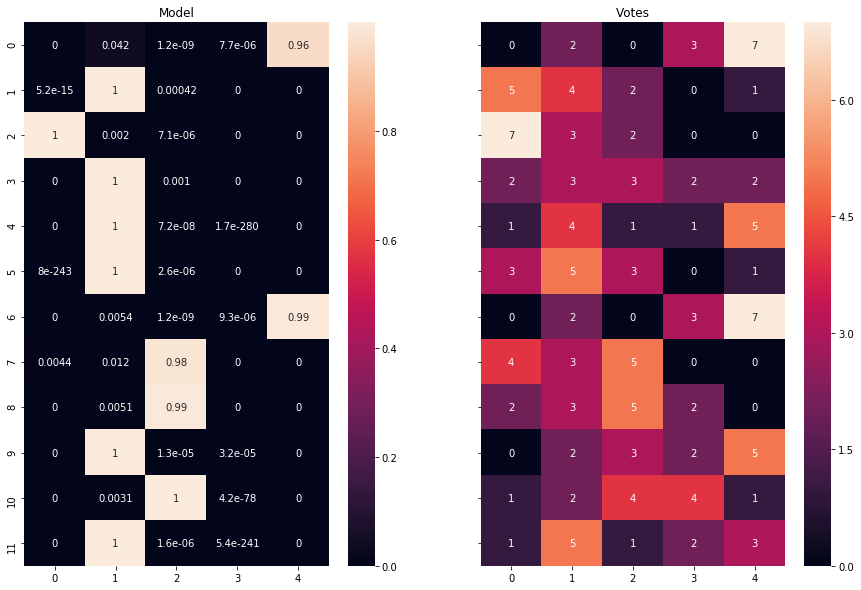

In [176]:
makeQuestionComparison(model, anno)

This differs markedly from taking annotator scores at face value. As you can see (the model-based probabilities are on left; the raw votes on right), the models helps us break ties between coders and in some cases dramatically downgrades the estimates from particularly bad coders.

Let's try everything again with ModelBt, which constrains ModelB so that each coder has a single estimate over the accuracy of all of their codes.

In [177]:
# create a new instance of model B, with 4 label classes and 8 annotators.
model = ModelBt.create_initial_state(5, 12)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.71223406 0.65636533 0.89826945 0.75974687 0.70003226 0.86170643
 0.81106118 0.83517025 0.63345997 0.74544312 0.80320061 0.84135379]
-1248.6474167788083


In [178]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.10465578 0.50010778 0.59499181 0.19411637 0.11332942 0.77548206
 0.0855587  0.16825588 0.19823029 0.37128086 0.08875227 0.70729277]
-946.2690960490393


In [179]:
model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

array([[0.18373868, 0.58240577, 0.58830476, ..., 0.47612431, 0.12570275,
        0.54495304],
       [0.18373868, 0.58240577, 0.58830476, ..., 0.47612431, 0.12570275,
        0.54495304],
       [0.18373868, 0.58240577, 0.58830476, ..., 0.47612431, 0.12570275,
        0.54495304],
       ...,
       [0.12080669, 0.51370661, 0.44021389, ..., 0.29688795, 0.14433891,
        0.66779605],
       [0.12080669, 0.51370661, 0.44021389, ..., 0.29688795, 0.14433891,
        0.66779605],
       [0.12080669, 0.51370661, 0.44021389, ..., 0.29688795, 0.14433891,
        0.66779605]])

In [180]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

[[3.24663221e-03 6.54585452e-01 9.55259730e-04 3.41212656e-01
  3.79892510e-12]
 [1.88457760e-04 8.95406783e-01 9.37865552e-02 1.06182037e-02
  2.41663835e-10]
 [1.50873163e-01 8.24729462e-01 1.29545651e-03 2.31019185e-02
  5.31653033e-10]
 [6.62695511e-03 9.08697004e-01 1.47408110e-02 6.99352297e-02
  5.17857310e-10]
 [4.75928853e-03 9.39241086e-01 1.95627884e-02 3.64368370e-02
  5.90961407e-12]
 [9.88884529e-05 9.99467078e-01 2.00698109e-05 4.13964200e-04
  4.45426686e-12]
 [4.55444727e-03 9.18266910e-01 1.34005942e-03 7.58385832e-02
  3.36357272e-11]
 [1.00699221e-02 9.50633569e-01 1.63979240e-02 2.28985848e-02
  5.26973638e-10]
 [9.41578586e-01 7.23773884e-03 4.00888319e-02 1.10948432e-02
  5.04987597e-10]
 [3.45713250e-03 1.22743136e-01 3.17123402e-04 8.73482608e-01
  3.06496584e-11]
 [3.78507616e-01 1.45649778e-01 2.85993370e-01 1.89849233e-01
  2.70227346e-09]
 [3.34115923e-05 9.99821185e-01 1.02334061e-05 1.35170355e-04
  8.95290957e-13]
 [2.18215670e-03 3.37145875e-03 5.195350

Let's visualize the posterior of the first 10 samples according to ModelBt.

(<matplotlib.figure.Figure at 0x1249f5e48>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x125e85e80>,
  <matplotlib.axes._subplots.AxesSubplot at 0x11c8baa90>))

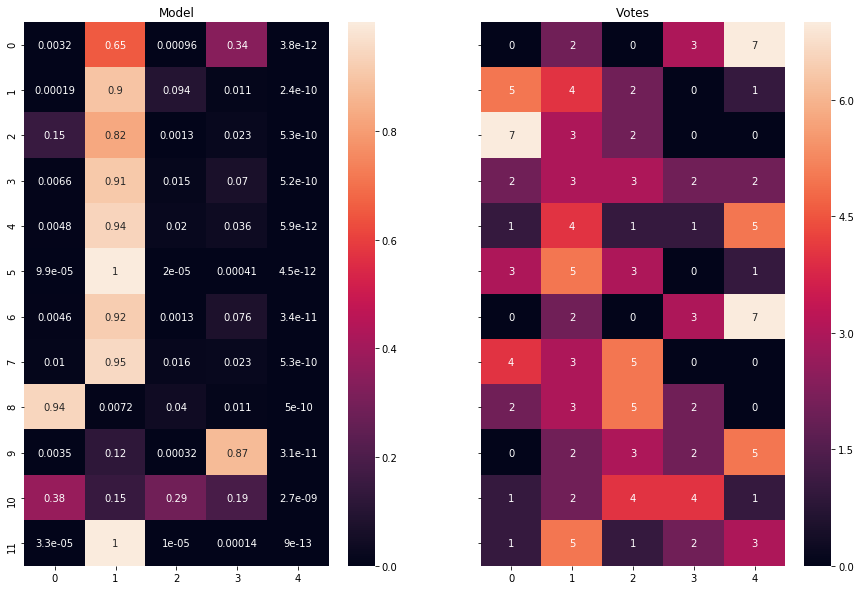

In [181]:
makeQuestionComparison(model, anno)

The property of these scores is that they enable us to identify the most likely code assuming coders of unequal quality, which also allows us to break ties when we know coder identity. We may also use the posterior themselves rather than the most probably code outcome.

## Visualizing coder accuracy

Let's make a plot of the accuracy for each annotator inferred from ModelBt. This might be helpful if you wanted to ban a "troll" from your crowdsourcing enterprise. The coder a very low accuracy likelihood is an outlier and should be "dropped from the team."

In [182]:
model = ModelBt.create_initial_state(5,12)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)
y_ci = samples.std(axis=0)

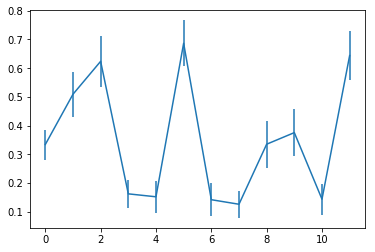

In [183]:
plt.figure()
plt.errorbar(range(12),y, yerr = y_ci)
plt.show()

# Hotel Reviews

If we want to do a simpler analysis we can look at a different data set, here are some hotel reviews from [expedia](https://www.kaggle.com/c/expedia-hotel-recommendations)

In [ ]:
df_hotels = pandas.read_csv('../data/hot_Reviews.csv', index_col=0)
df_hotels[:5]

Here a rank of 0 is a missing value and to simplify things more we will convert from a 1-10 scale to a 1-5 scale, with 0 as missing

In [ ]:
df_hotels = df_hotels.apply(lambda x: x // 2) #integer divide by 2 rounds all values

And we can visualize all the reviews as a heatmap with the missing values greyed out

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))
seaborn.heatmap(df_hotels, cmap='rainbow', ax = ax)
plt.show()

To give the dataframe to pyanno we need to convert to np array and change the nans to intergers, lets use -1

In [ ]:
hot_mat = np.array(df_hotels.fillna(-1).as_matrix())
anno_hot = AnnotationsContainer.from_array(hot_mat, missing_values=[-1])

In [ ]:
anno_hot.annotations

In [ ]:
anno_hot.labels

In [ ]:
anno_hot.missing_values

Look at coder agreement

In [ ]:
pyanno.measures.agreement.labels_frequency(anno_hot.annotations, 6)#6 possible catagories

In [ ]:
c = pyanno.measures.agreement.confusion_matrix(anno_hot.annotations[:,0], anno_hot.annotations[:,1], 6) #6 possible catagories
print(c)
ac = seaborn.heatmap(c)
plt.show()

Most agreement is on 2 i.e. an average hotel and there's little agreement as rating go higher, likely due to scarcity in the sample

In [ ]:
scotts_pi(anno_hot.annotations[:,0], anno_hot.annotations[:,1])

In [ ]:
krippendorffs_alpha(anno_hot.annotations[::])

In [ ]:
cohens_kappa(anno_hot.annotations[:,0], anno_hot.annotations[:,1])

In [ ]:
m = pairwise_matrix(cohens_kappa, anno_hot.annotations)
fig, ax = plt.subplots(figsize = (15, 15))
seaborn.heatmap(m, ax =ax)

And to look at what model Bt thinkgs the correct reviews are:

In [ ]:
model_hot = ModelBt.create_initial_state(6, 49)
model_hot.mle(anno_hot.annotations)
#print(model.theta)
print(model_hot.log_likelihood(anno_hot.annotations))

In [ ]:
makeQuestionComparison(model_hot, anno_hot)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, use the results of your content annotation survey to predict high and low-quality analysts, then predict MLE or MAP estimates for your codes in question. What do these estimates suggest about the distribution of skill among your coders? How different are these estimates from a majority vote?

In [184]:
# create a new instance of model B, with 5 label classes and 12 annotators.
# Note: I accidently changed some of the code above already to be applied to my data
# As such, this will seem repetitive, but in reality, it's not!
model2 = ModelBt.create_initial_state(5, 12)
print(model2.theta)
print(model2.log_likelihood(anno.annotations))

[0.7779622  0.80269807 0.60006881 0.62085785 0.88504998 0.82992979
 0.60777341 0.92147786 0.62181771 0.73537586 0.76588243 0.69191327]
-1234.2390824603726


In [185]:
sample2 = model2.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

In [186]:
model2.map(anno.annotations)
print(model2.theta)
print(model2.log_likelihood(anno.annotations))

[0.16907085 0.84920319 0.59794863 0.49998344 0.08497841 0.60236794
 0.38585153 0.16371089 0.207522   0.57089659 0.29768996 0.78115966]
-994.5652577290574


In [187]:
posterior2 = model2.infer_labels(anno.annotations)
print(posterior2)

[[3.18130995e-03 1.53309412e-01 2.81613943e-03 8.40693138e-01
  2.05171410e-10]
 [1.29618277e-02 7.96961491e-01 1.89144533e-01 9.32148669e-04
  4.02091854e-11]
 [7.79145700e-01 1.91102007e-01 2.85627818e-02 1.18951127e-03
  4.89859720e-11]
 [1.74272712e-02 6.98251532e-01 2.63277487e-01 2.10437077e-02
  2.39376049e-09]
 [1.02510192e-03 9.85556483e-01 5.24950960e-03 8.16890521e-03
  1.50651286e-11]
 [1.92297357e-04 9.99745713e-01 4.76469664e-05 1.43426049e-05
  4.80724143e-13]
 [5.71863956e-03 2.75584989e-01 5.06221858e-03 7.13634152e-01
  7.81002099e-10]
 [3.71081594e-02 3.18223707e-01 6.43224926e-01 1.44320721e-03
  5.94335754e-11]
 [2.31954803e-02 3.90119479e-03 9.72810546e-01 9.27788710e-05
  9.81924446e-12]
 [9.18009821e-03 6.85202700e-01 1.13007910e-02 2.94316409e-01
  2.26568907e-09]
 [9.23394729e-02 4.89419579e-01 3.77738108e-01 4.05028383e-02
  9.47400807e-10]
 [7.31159670e-05 9.99874375e-01 4.36665470e-05 8.84255389e-06
  5.36903265e-13]
 [4.19837328e-04 1.22745377e-02 2.910116

In [188]:
def makeQuestionComparison(model, anno_target, num_questions = 12):
    votes = []
    for r in anno_target.annotations:
        v = [0] * len(anno_target.labels)
        votes.append(v)
        for a in r:
            if a > -1:
                v[a] += 1
    votes_array = np.array(votes)
    posterior = model.infer_labels(anno_target.annotations)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)

    seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
    seaborn.heatmap(np.nan_to_num(posterior,0)[:num_questions], annot=True, ax =ax1)
    ax1.set_title("Model")
    ax2.set_title("Votes")
    return fig, (ax1, ax2)

(<matplotlib.figure.Figure at 0x125abbe10>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x1252f9048>,
  <matplotlib.axes._subplots.AxesSubplot at 0x123689e10>))

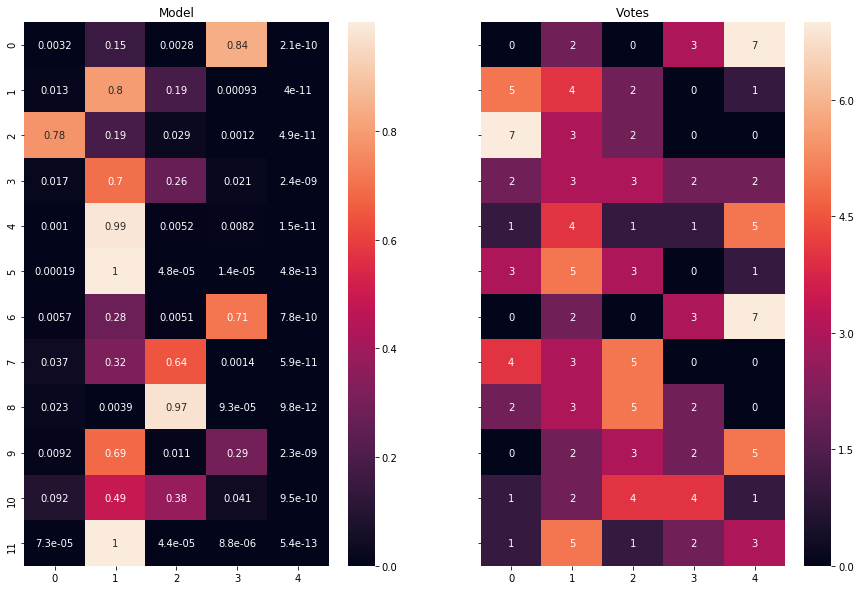

In [189]:
makeQuestionComparison(model2, anno)

In [190]:
# create a new instance of model B, with 2 label classes and 3 annotators.
modelB2 = ModelBt.create_initial_state(5, 12)
print(modelB2.theta)
print(modelB2.log_likelihood(anno.annotations))

[0.72311128 0.63461767 0.82667588 0.86282048 0.71482917 0.66731511
 0.89007143 0.84292302 0.88118913 0.90486998 0.87412762 0.89128098]
-1305.4278556280863


In [191]:
modelB2.map(anno.annotations)
print(modelB2.theta)
print(modelB2.log_likelihood(anno.annotations))

[0.56915411 0.6541762  0.79842521 0.70944779 0.12027487 0.84333653
 0.60224616 0.19446283 0.31505118 0.75707781 0.25771645 0.80809483]
-1060.2853425371452


In [192]:
modelB2.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)


array([[0.5651199 , 0.51654178, 0.75131071, ..., 0.46046567, 0.27115287,
        0.55592905],
       [0.5651199 , 0.51654178, 0.75131071, ..., 0.46046567, 0.27115287,
        0.55592905],
       [0.5651199 , 0.51654178, 0.75131071, ..., 0.46046567, 0.27115287,
        0.55592905],
       ...,
       [0.53323754, 0.43088541, 0.52909686, ..., 0.46244272, 0.12412698,
        0.6197255 ],
       [0.53323754, 0.43088541, 0.52909686, ..., 0.46244272, 0.12412698,
        0.6197255 ],
       [0.52303662, 0.4023927 , 0.6361096 , ..., 0.38918138, 0.17812151,
        0.60258382]])

In [193]:
posterior = modelB2.infer_labels(anno.annotations)
print(posterior)

[[1.26512837e-03 2.54872825e-01 4.96780697e-04 7.43365265e-01
  2.91406629e-10]
 [1.65775722e-01 7.60771697e-01 7.31780231e-02 2.74557554e-04
  7.01692284e-13]
 [9.95501052e-01 3.54166737e-03 9.41346827e-04 1.59338286e-05
  2.21335191e-14]
 [3.74701592e-02 6.13063574e-01 1.18555699e-01 2.30910567e-01
  2.89268528e-10]
 [1.01863931e-04 9.99265305e-01 4.68123818e-04 1.64707661e-04
  7.09680810e-13]
 [1.75008571e-04 9.99819218e-01 4.10652848e-06 1.66646019e-06
  1.22318793e-14]
 [2.04784391e-03 4.12558738e-01 8.04131302e-04 5.84589286e-01
  9.70901899e-10]
 [4.31843359e-01 2.46769177e-01 3.21040690e-01 3.46773714e-04
  4.81699834e-13]
 [2.79945911e-01 1.81846093e-01 5.37883380e-01 3.24616310e-04
  4.48156589e-13]
 [4.73584501e-03 3.15366423e-01 4.58832190e-03 6.75309404e-01
  5.51149421e-09]
 [1.47950587e-02 2.37704993e-02 9.56899184e-01 4.53525849e-03
  4.98105990e-12]
 [2.01154158e-05 9.99975753e-01 1.81122241e-06 2.31995646e-06
  5.11950841e-14]
 [1.76635621e-05 1.64003296e-02 6.697603

(<matplotlib.figure.Figure at 0x11c8e5a20>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x11ef34780>,
  <matplotlib.axes._subplots.AxesSubplot at 0x124cc5f28>))

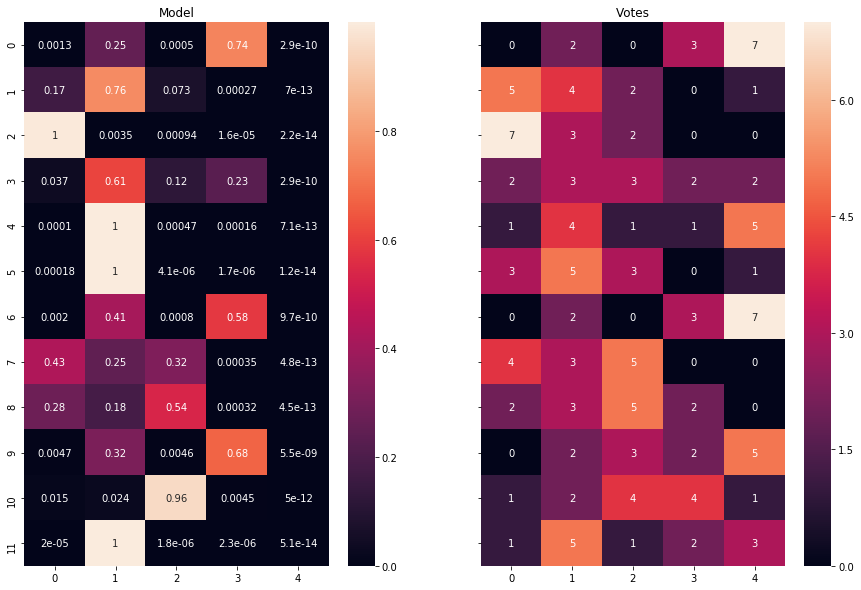

In [194]:
makeQuestionComparison(modelB2, anno)

In [195]:
#Coder Accuracy
model = ModelBt.create_initial_state(5,12)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)
y_ci = samples.std(axis=0)

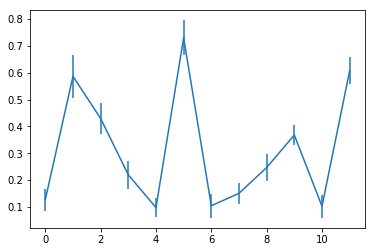

In [196]:
plt.figure()
plt.errorbar(range(12),y, yerr = y_ci)
plt.show()

In [ ]:
#Now that I'm looking at this, I'm wondering if my measures are correct, given that I actually had 50 response? I think I mixed up the variables.